In [0]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [0]:
F, q, Q, x, a, e = sympy.symbols(["F", "q", "Q", "x", "a", "e"])

expr1 = 1/(4*sympy.pi*e)
expr2 = q*Q*x/((x**2 + a**2)**1.5)
function = expr1*expr2 - F

values = {F: 1.25, q: 2*10**-5, Q: 2*10**-5, a: 0.9, e: 8.85*10**-12}
function = function.subs(values)

f = lambda y: sympy.lambdify(x, function, 'numpy')(y)
fp = lambda y: sympy.lambdify(x, sympy.diff(function, x), 'numpy')(y)


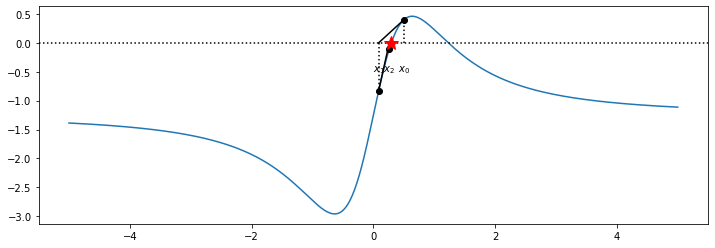

In [29]:
X = np.linspace(-5, 5, 800)
fig, ax = plt.subplots(1, 1, figsize=(12,4))

ax.plot(X, f(X))
ax.axhline(0, ls=':', color='k')

tol = 0.01
x_inicial = 0.5
n = 0

while abs(f(x_inicial)) > tol:
    x_new = x_inicial - f(x_inicial) / fp(x_inicial)

    ax.plot([x_inicial, x_inicial], [0, f(x_inicial)], color='k', ls=':')
    ax.plot(x_inicial, f(x_inicial), 'ko')
    ax.text(x_inicial, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([x_inicial, x_new], [f(x_inicial), 0], 'k-')

    x_inicial = x_new
    n += 1

ax.plot(x_inicial, f(x_inicial), 'r*', markersize=15)

<p align="center"><img src="images/eletromag.png" align=middle width=430pt height=430pt/></p>